# Goal
***In this task, you will be predicting whether a user will churn after their subscription expires. Specifically, we want to see if a user make a new service subscription transaction within 30 days after their current membership expiration date.***

In [2]:
from __future__ import division
import pandas as pd
import numpy as np
from sklearn.cross_validation import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN

    # trsc data
df_transaction = pd.read_csv('transactions_v2.csv', error_bad_lines=False)
df_transaction.head()

C:\Users\Chang_000\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
b'Skipping line 26005: expected 9 fields, saw 14\nSkipping line 39009: expected 9 fields, saw 14\n'
b'Skipping line 104028: expected 9 fields, saw 13\nSkipping line 117028: expected 9 fields, saw 13\n'
b'Skipping line 221053: expected 9 fields, saw 10\nSkipping line 234057: expected 9 fields, saw 10\nSkipping line 260064: expected 9 fields, saw 15\n'
b'Skipping line 273067: expected 9 fields, saw 15\n'
b'Skipping line 494117: expected 9 fields, saw 12\nSkipping line 507122: expected 9 fields, saw 12\n'
b'Skipping line 611147: expected 9 fields, saw 15\nSkipp

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32.0,90.0,298.0,298.0,0.0,20170131.0,20170504.0,0.0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41.0,30.0,149.0,149.0,1.0,20150809.0,20190412.0,0.0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36.0,30.0,180.0,180.0,1.0,20170303.0,20170422.0,0.0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36.0,30.0,180.0,180.0,1.0,20170329.0,20170331.0,1.0
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41.0,30.0,99.0,99.0,1.0,20170323.0,20170423.0,0.0


In [3]:
    # churn_data
df_submission = pd.read_csv('sample_submission_v2.csv')
df_train = pd.read_csv('train_v2.csv')

In [4]:
    # combin sub x train
df_is_chrun = [df_submission,df_train]
df_is_chrun = pd.concat(df_is_chrun)
df_is_chrun['is_churn'].sum()

87330

In [ ]:
    # log data
df_log = pd.read_csv('user_logs_v2.csv')
df_log.head()

In [5]:
    # user data
df_member = pd.read_csv('members_v3.csv')
df_member.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [6]:
# merge
df_merge = pd.merge(df_member, df_is_chrun, how= 'left', on = 'msno')
df_merge = pd.merge(df_merge, df_transaction, how= 'left', on = 'msno')
df_merge.head()

,msno,city,bd,gender,registered_via,registration_init_time,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914,0.0,41.0,30.0,129.0,129.0,1.0,20170327.0,20170428.0,0.0
2,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914,0.0,41.0,30.0,129.0,129.0,1.0,20170327.0,20170428.0,0.0
3,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914,0.0,41.0,30.0,129.0,129.0,1.0,20170327.0,20170428.0,0.0
4,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914,0.0,41.0,30.0,129.0,129.0,1.0,20170327.0,20170428.0,0.0


In [7]:
    # sql like distonct
df_merge = df_merge.drop_duplicates()
    # remove nan
df_merge = df_merge.dropna()
df_merge.head()

,msno,city,bd,gender,registered_via,registration_init_time,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
9,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915,0.0,40.0,30.0,149.0,149.0,1.0,20170314.0,20170413.0,0.0
12,yLkV2gbZ4GLFwqTOXLVHz0VGrMYcgBGgKZ3kj9RiYu8=,4,30,male,9,20110916,0.0,39.0,30.0,149.0,149.0,1.0,20170331.0,20170517.0,0.0
15,yLkV2gbZ4GLFwqTOXLVHz0VGrMYcgBGgKZ3kj9RiYu8=,4,30,male,9,20110916,0.0,39.0,30.0,149.0,149.0,1.0,20170228.0,20170417.0,0.0
23,I0yFvqMoNkM8ZNHb617e1RBzIS/YRKemHO7Wj13EtA0=,13,63,male,9,20110918,0.0,40.0,30.0,149.0,149.0,1.0,20170327.0,20170426.0,0.0
37,4De1jAxNRABoyRBDZ82U0yEmzYkqeOugRGVNIf92Xb8=,4,28,female,9,20110920,0.0,36.0,30.0,180.0,180.0,1.0,20170303.0,20170402.0,0.0


In [8]:
    # transfer gender
df_merge['sex'] = np.where(df_merge['gender'] == 'male',1,0)
    # change metric type
df_merge[['is_churn']] = df_merge[['is_churn']].astype(int)
print(df_merge.dtypes)

msno                       object
city                        int64
bd                          int64
gender                     object
registered_via              int64
registration_init_time      int64
is_churn                  float64
payment_method_id         float64
payment_plan_days         float64
plan_list_price           float64
actual_amount_paid        float64
is_auto_renew             float64
transaction_date          float64
membership_expire_date    float64
is_cancel                 float64
sex                         int32
dtype: object


In [9]:
    # Isolate y
y = df_merge['is_churn']
    # drop useless cols
drop_cols = ['city','bd','registered_via','msno', 'gender','registration_init_time',
             'transaction_date','membership_expire_date','is_churn','is_auto_renew','is_cancel','sex']
df_merge_drop = df_merge.drop(drop_cols,axis=1)
df_merge_drop = df_merge_drop.dropna() 
df_merge_drop.head()

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid
9,40.0,30.0,149.0,149.0
12,39.0,30.0,149.0,149.0
15,39.0,30.0,149.0,149.0
23,40.0,30.0,149.0,149.0
37,36.0,30.0,180.0,180.0


In [10]:
    # reset rows order
df_merge_drop = df_merge_drop.reset_index()
#df_merge_drop = df_merge_drop.apply(lambda x: pd.to_numeric(x,errors='ignore'))
print(df_merge_drop.isnull().any())
#df_merge_drop = df_merge_drop.fillna(lambda x: x.median())
df_merge_drop = df_merge_drop.fillna(method='ffill')
print('---')
df_merge_drop.head()

index                 False
payment_method_id     False
payment_plan_days     False
plan_list_price       False
actual_amount_paid    False
dtype: bool
---


,index,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid
0,9,40.0,30.0,149.0,149.0
1,12,39.0,30.0,149.0,149.0
2,15,39.0,30.0,149.0,149.0
3,23,40.0,30.0,149.0,149.0
4,37,36.0,30.0,180.0,180.0


In [11]:
    # Pull out features for future use
features = df_merge_drop.columns
print(features)

Index(['index', 'payment_method_id', 'payment_plan_days', 'plan_list_price',
       'actual_amount_paid'],
      dtype='object')


In [12]:
    # define X
X = df_merge_drop.as_matrix().astype(np.float32)

    # Standardize features by removing the mean and scaling to unit variance    
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import Imputer

scaler = preprocessing.StandardScaler()
#scaler = StandardScaler()
X = scaler.fit_transform(X)

imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
X = imp.fit_transform(X)


print('Feature space holds %d observations and %d features' % X.shape)
print("Unique target labels:", np.unique(y))
print(X.dtype)

Feature space holds 536590 observations and 5 features
Unique target labels: [ 0.  1.]
float32


In [260]:
def is_finite(df):
    print(df[:,0].shape)
    index = 0
    for i in df[:,0]:
        if not np.isfinite(i):
            print(index, i)
        index +=1
is_finite(X)
print('---')

def _assert_all_finite(X):
    """Like assert_all_finite, but only for ndarray."""
    X = np.asanyarray(X)
    # First try an O(n) time, O(1) space solution for the common case that
    # everything is finite; fall back to O(n) space np.isfinite to prevent
    # false positives from overflow in sum method.
    if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
            and not np.isfinite(X).all()):
        raise ValueError("Input contains NaN, infinity"
                         " or a value too large for %r." % X.dtype)
print(_assert_all_finite(X))
print('---')
print(np.any(np.isnan(X)))
print('---')
print(np.all(np.isfinite(X)))

(536590,)
---
None
---
False
---
True


In [ ]:
    # clean the dataset of nan, Inf, and missing cells
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float32)

clean_dataset(df_merge_drop)
print(df_merge_drop.dtypes)

In [ ]:
from sklearn.cross_validation import KFold

def run_cross_validation(X,y,clf_class,**kwargs):
    kf = KFold(len(y), n_folds=5, shuffle=True)
    y_pred=y.copy()
    
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(x_test)
        return y_pred

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN

def accuracy(y_true,y_pred):
    # NumPy interprets True and False as 1. and 0.
    return np.mean(y_true == y_pred)

print("svm:")
print("%.3f" % accuracy(y, run_cross_validation(X,y,SVC)))
print("rf:")
print("%.3f" % accuracy(y, run_cross_validation(X,y,RF)))
print("knn:")
print("%.3f" % accuracy(y, run_cross_validation(X,y,KNN)))

### svm

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
clf = SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

y_pred = clf.predict(X_test)

accurate_score = metrics.accuracy_score(y_test, y_pred) #np.mean(y_test == y_pred)
#scores = cross_val_score(clf, y_pred, y_test, cv=10, scoring='accuracy')
print(accurate_score)
print('---')
#print(scores.mean())

0.899727911441
---


Confusion matrix, without normalization
[[95284   296]
 [10465  1273]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.89  0.11]]


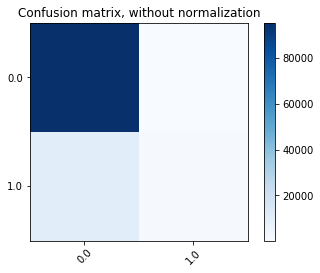

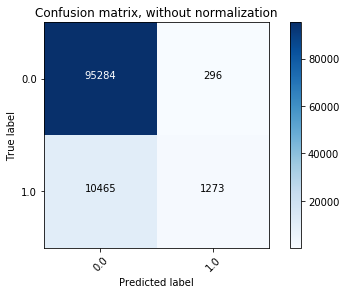

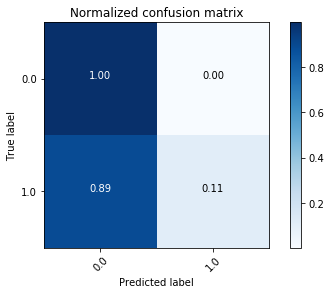

In [23]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, 
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
# AUC & ROC
